# **Predicting the compressive strength of concrete using Machine Learning techniques**

- Author : Sruthi S
- Date : 24 November 2020

### **Dataset Description**
The dataset was taken from  <a href="http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength">UCI Machine Learning Repository</a> It contains 1030 instances and 9 attributes with surprisingly no missing values. Among the 8 input variables, 7 represent the amount of raw materials and 1 represents age. The target variable is Concrete Compressive Strength (obviously) messured in Mega Pascal(MPa).



**Mounting the drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/Internship/'

/content/drive/MyDrive/Internship


**Importing the required dependencies**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

**Loading the dataset**

In [4]:
df = pd.read_excel("Dataset/Concrete_Data.xls")

In [5]:
df.head() #Prints first few rows

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


We can see that there are 9 attributes in the dataset :

_**Raw materials**_
<ui>
  <li>Cement</li>
  <li> Blast Furnace Slag </li>
  <li> Fly Ash </li>
  <li> Water </li>
  <li> Superplasticizer </li>
  <li> Coarse Aggregate Component </li>
  <li> Fine Aggregate </li>
  
_**Other stuff**_
  <li>Age </li>

_**Target variabe**_
  <li> Concrete Compressive Strength </li>

But the column names appear to be really messy, so we can rename those for better readability and easy access.

In [6]:
rename_cols = ["Cement", "Blast_Furnace_Slag", "Fly_Ash", "Water", "Superplasticizer",
                 "Coarse_Aggregate", "Fine_Aggregate", "Age", "CCS"]
cols = list(df.columns)

map = {}
for i, name in enumerate(cols):
    map[name] = rename_cols[i]

df = df.rename(columns=map)

In [7]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### **Exploraory Data Analysis**

To get a better understanding of what we're dealing with, we ought to explore the dataset. You don't have to go all Dora on this, but a little bit of curiosity is appreciated.

In [8]:
df.shape #Instances of the dataset

(1030, 9)

In [9]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast_Furnace_Slag  1030 non-null   float64
 2   Fly_Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse_Aggregate    1030 non-null   float64
 6   Fine_Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   CCS                 1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


- The dataset comprises mostly of float and integer values.

In [11]:
df.isna().any() #Checking for missing values

Cement                False
Blast_Furnace_Slag    False
Fly_Ash               False
Water                 False
Superplasticizer      False
Coarse_Aggregate      False
Fine_Aggregate        False
Age                   False
CCS                   False
dtype: bool

- It feels so good to have a dataset that has no missing values :')

### **Data visualisation**

Python has a visualisation library called Seaborn which helps in creating appealing statistical plots in order to perform further analysis. 

In order to make use of linear regression models, it is important to remove correlated variables.

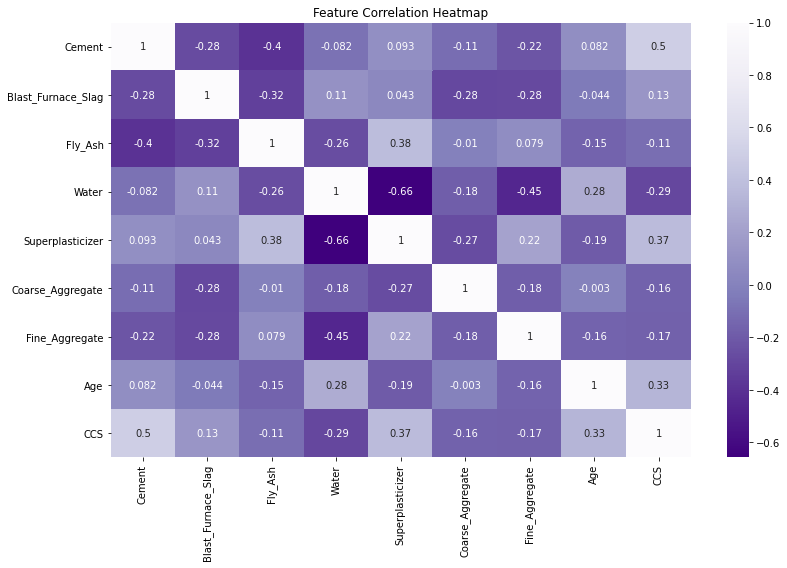

In [12]:
corr = df.corr()
plt.figure(figsize=(13,8))
plt.title("Feature Correlation Heatmap")
sns.heatmap(corr,cmap= "Purples_r",annot=True)

- From this heatmap we can see that Cement is highly correlated with Compressive Strength (0.5)
- Superplasticizer and Age are also correlated with Compressive Strength with values 0.37 and 0.33 respectively.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Compressive Strength')

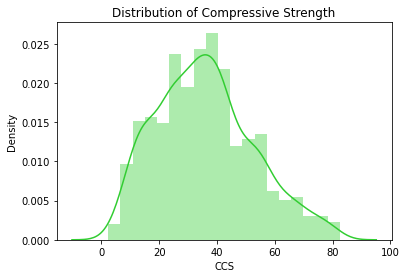

In [13]:
dist = sns.distplot(df['CCS'], color = 'limegreen')
plt.title('Distribution of Compressive Strength')

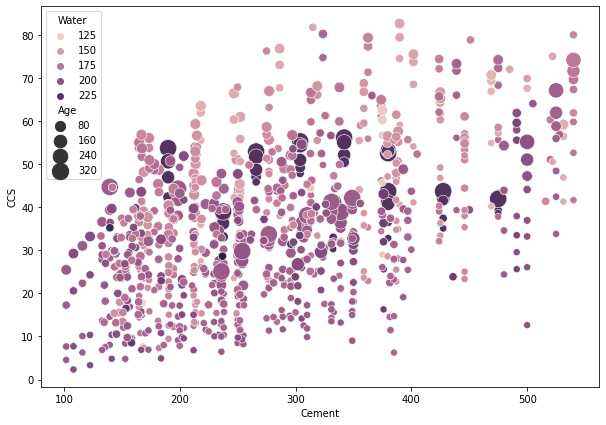

In [14]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = df,y="CCS",x="Cement",hue="Water",size="Age",sizes=(50,300))

### **Data Pre-processing**

In [15]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [17]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.fit_transform(X_test)

### **Building the model**

**Decision trees**


Another algorithm that would give better performance in this case would be Decision Trees, since we have a lot of zeros in some of the input features as seen from their distributions in the pair plot above. This would help the decision trees build trees based on some conditions on features which can further improve performance

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regression 	 8.93 		 79.82 		5.71 		0.68


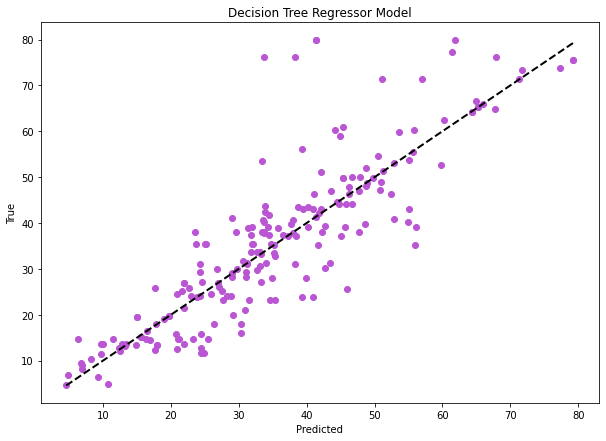

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")

print("""Decision Tree Regression \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dt)),mean_squared_error(y_test, y_pred_dt),
            mean_absolute_error(y_test, y_pred_dt), r2_score(y_test, y_pred_dt)))

plt.figure(figsize=(10,7))
plt.scatter(y_test,y_pred_dt, color = 'mediumorchid')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor Model")
plt.show()

**Random Forest Regressor**

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 6.31 		 39.78 		4.40 		0.84


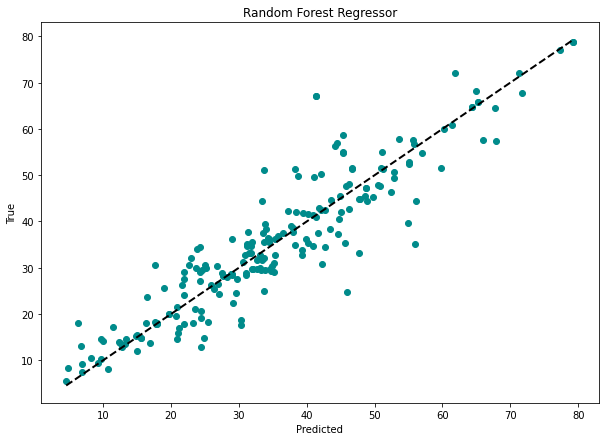

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rf)),mean_squared_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf)))

plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_rf, color = 'darkcyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.25 		 104.97 	7.83 		0.57


Text(0, 0.5, 'True')

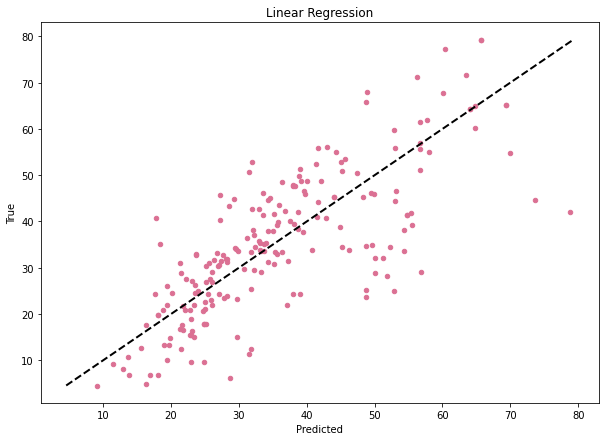

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

plt.figure(figsize=(10,7))
plt.scatter(y_pred_lr,y_test,s=20, color = 'palevioletred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Linear Regression")
plt.xlabel('Predicted')
plt.ylabel('True')

**Feature Importance for DTR and RFR**

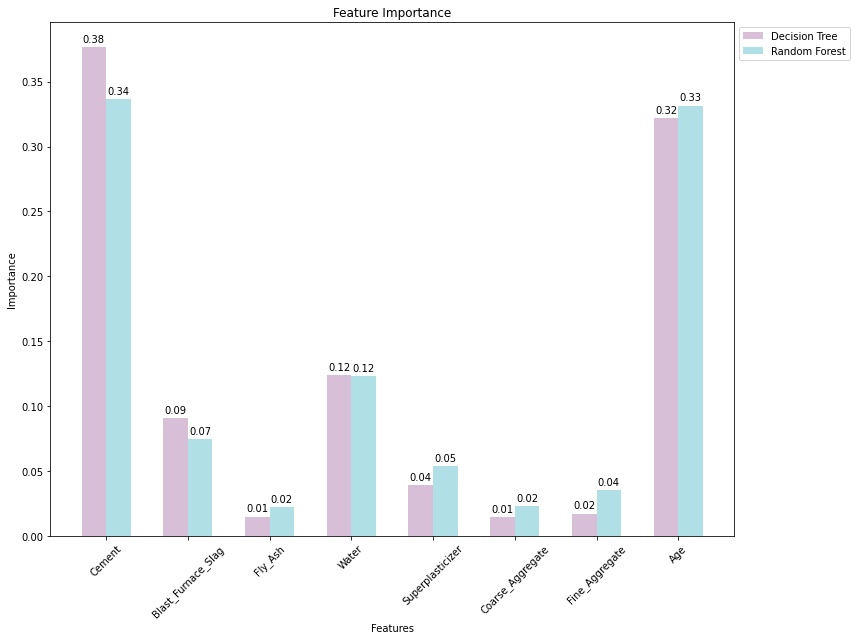

In [22]:
feature_dt = dt.feature_importances_
feature_rf = rf.feature_importances_
labels = rename_cols[:-1]

x = np.arange(len(labels))
width = 0.3


fig, ax = plt.subplots(figsize=(12,9))
rects1 = ax.bar(x-(width/2), feature_dt, width, label='Decision Tree', color = 'thistle')
rects2 = ax.bar(x+(width/2), feature_rf, width, label='Random Forest',color = 'powderblue')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Clearly, Cement and Age are the most important features followed by Water to some extent. Fly_Ash, Superplasticizer, Fine and Course Aggregates don't contribute much to the compressive strength of concrete

**Comparing the models**

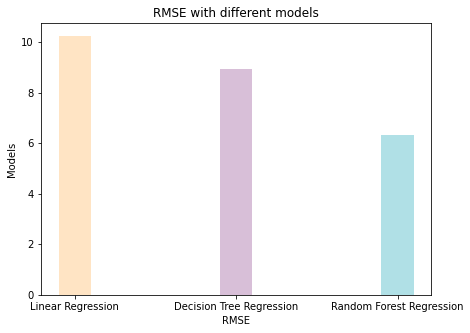

In [23]:
models = [lr,dt,rf]
names = ["Linear Regression","Decision Tree Regression","Random Forest Regression"]
rmse = []

for model in models : 
  rmse.append(np.sqrt(mean_squared_error(y_test,model.predict(X_test))))

x = np.arange(len(names))
width = 0.2
plt.figure(figsize=(7,5))
modelplot = plt.bar(x,rmse,width,color = ['bisque','thistle','powderblue'])
plt.xlabel("RMSE")
plt.title("RMSE with different models")
plt.ylabel("Models")
plt.xticks(x,names,rotation = False)
autolabel(modelplot)

### **Conclusion**

Random Forest Regression provided the least RMSE. Hence, it is the best model for this predicting the compressive strength of concrete.

In [24]:
with open('prediction_model.sav','wb') as fout:
  pkl.dump(rf,fout)